In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
base_dir = '/content/drive/MyDrive/images'

In [51]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 87 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


In [52]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # apple, banana, cherry = 3 classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [54]:
save_dir = '/content/drive/MyDrive/model_checkpoints'
os.makedirs(save_dir, exist_ok=True)

checkpoint_path = os.path.join(save_dir, 'best_model.h5')

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


In [55]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)




/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2/3 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3866 - loss: 1.6456 


Epoch 1: val_loss improved from inf to 1.55262, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3944 - loss: 1.8829 - val_accuracy: 0.2857 - val_loss: 1.5526
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3819 - loss: 1.1758   
Epoch 2: val_loss improved from 1.55262 to 1.09655, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3698 - loss: 1.1769 - val_accuracy: 0.3810 - val_loss: 1.0966
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4009 - loss: 1.0563
Epoch 3: val_loss improved from 1.09655 to 1.01341, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3926 - loss: 1.0614 - val_accuracy: 0.3810 - val_loss: 1.0134
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4814 - loss: 0.9796
Epoch 4: val_loss improved from 1.01341 to 0.94044, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4760 - loss: 0.9794 - val_accuracy: 0.3333 - val_loss: 0.9404
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.4224 - loss: 0.9351
Epoch 5: val_loss improved from 0.94044 to 0.85963, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4461 - loss: 0.9277 - val_accuracy: 0.6190 - val_loss: 0.8596
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6205 - loss: 0.8450
Epoch 6: val_loss improved from 0.85963 to 0.81105, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6176 - loss: 0.8551 - val_accuracy: 0.6667 - val_loss: 0.8111
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.6520 - loss: 0.7763
Epoch 7: val_loss improved from 0.81105 to 0.75256, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6614 - loss: 0.7807 - val_accuracy: 0.7143 - val_loss: 0.7526
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7195 - loss: 0.8155
Epoch 8: val_loss improved from 0.75256 to 0.63827, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7235 - loss: 0.8069 - val_accuracy: 0.8571 - val_loss: 0.6383
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7592 - loss: 0.6106
Epoch 9: val_loss improved from 0.63827 to 0.62944, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7504 - loss: 0.6125 - val_accuracy: 0.7143 - val_loss: 0.6294
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.7098 - loss: 0.5613
Epoch 10: val_loss improved from 0.62944 to 0.45944, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7162 - loss: 0.5542 - val_accuracy: 0.8095 - val_loss: 0.4594
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7387 - loss: 0.5698
Epoch 11: val_loss did not improve from 0.45944
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7523 - loss: 0.5524 - val_accuracy: 0.7619 - val_loss: 0.5534
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7721 - loss: 0.4530
Epoch 12: val_loss did not improve from 0.45944
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7716 - loss: 0.4586 - val_accuracy: 0.8571 - val_loss: 0.4634
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.8095 - loss: 0.4792
Epoch 13: val_loss did not improve from 0.45944
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7997 - loss: 0.4847 - val_accuracy: 0.8095 - val_loss: 0.5163
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8359 - loss: 0.3689   
Epoch 14: val_loss improved from 0.45944 to 0.42865, saving model to /cont

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.8338 - loss: 0.3683 - val_accuracy: 0.8095 - val_loss: 0.4286
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7530 - loss: 0.4533
Epoch 15: val_loss improved from 0.42865 to 0.39948, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7601 - loss: 0.4453 - val_accuracy: 0.8571 - val_loss: 0.3995
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9096 - loss: 0.3411
Epoch 16: val_loss did not improve from 0.39948
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9035 - loss: 0.3495 - val_accuracy: 0.9048 - val_loss: 0.4078
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8635 - loss: 0.3903
Epoch 17: val_loss improved from 0.39948 to 0.37396, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.8660 - loss: 0.3741 - val_accuracy: 0.9048 - val_loss: 0.3740
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 895ms/step - accuracy: 0.8591 - loss: 0.2831
Epoch 18: val_loss improved from 0.37396 to 0.30690, saving model to /content/drive/MyDrive/model_checkpoints/best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8684 - loss: 0.2796 - val_accuracy: 0.9048 - val_loss: 0.3069
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8913 - loss: 0.2884
Epoch 19: val_loss did not improve from 0.30690
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8955 - loss: 0.2775 - val_accuracy: 0.8571 - val_loss: 0.4039
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8613 - loss: 0.2625
Epoch 20: val_loss did not improve from 0.30690
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8672 - loss: 0.2614 - val_accuracy: 0.9048 - val_loss: 0.3281
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9375 - loss: 0.1665   
Epoch 21: val_loss did not improve from 0.30690
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9416 - loss: 0.1635 - val_accuracy: 0.9048 - val_loss: 0.3386
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9583 - loss: 0.1251   
Epoch 22: val_loss did not improve from 0.30690
3/3 ━━━━━━━━━━━━━━━━━━━━ 5

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9051 - loss: 0.1628 - val_accuracy: 0.9048 - val_loss: 0.2428
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.9396 - loss: 0.1627
Epoch 24: val_loss did not improve from 0.24275
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9432 - loss: 0.1584 - val_accuracy: 0.9048 - val_loss: 0.2966
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 935ms/step - accuracy: 0.9566 - loss: 0.1558
Epoch 25: val_loss did not improve from 0.24275
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9531 - loss: 0.1542 - val_accuracy: 0.9048 - val_loss: 0.3354
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9583 - loss: 0.1344
Epoch 26: val_loss did not improve from 0.24275
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9544 - loss: 0.1360 - val_accuracy: 0.9048 - val_loss: 0.2762
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9558 - loss: 0.0953
Epoch 27: val_loss did not improve from 0.24275
3/3 ━━━━━━━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9268 - loss: 0.1463 - val_accuracy: 0.9524 - val_loss: 0.1776
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9522 - loss: 0.1182
Epoch 30: val_loss did not improve from 0.17761
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9498 - loss: 0.1182 - val_accuracy: 0.9048 - val_loss: 0.2135
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.9923 - loss: 0.0554
Epoch 31: val_loss did not improve from 0.17761
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9885 - loss: 0.0620 - val_accuracy: 0.9048 - val_loss: 0.4038
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9512 - loss: 0.1236   
Epoch 32: val_loss did not improve from 0.17761
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9577 - loss: 0.1130 - val_accuracy: 0.9524 - val_loss: 0.2949
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9885 - loss: 0.0661
Epoch 33: val_loss did not improve from 0.17761
3/3 ━━━━━━━━━━━━━━━━━━━━ 5

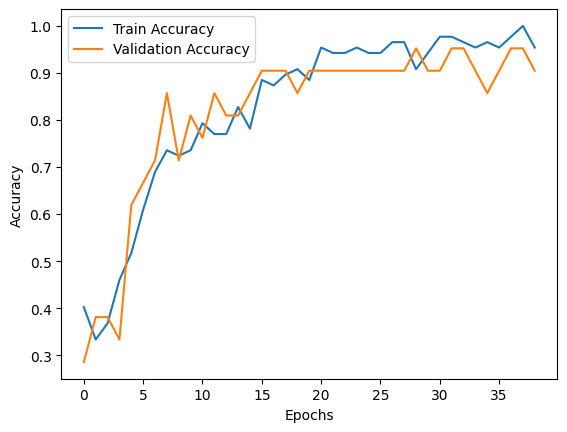

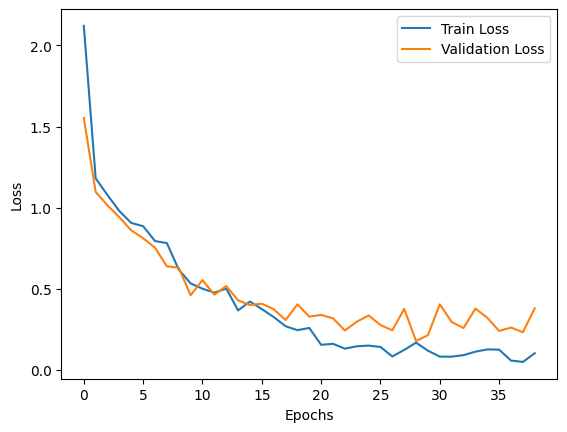

In [56]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [57]:
from tensorflow.keras.models import load_model

best_model = load_model(checkpoint_path)
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9524 - loss: 0.1586
Validation Accuracy: 0.95


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


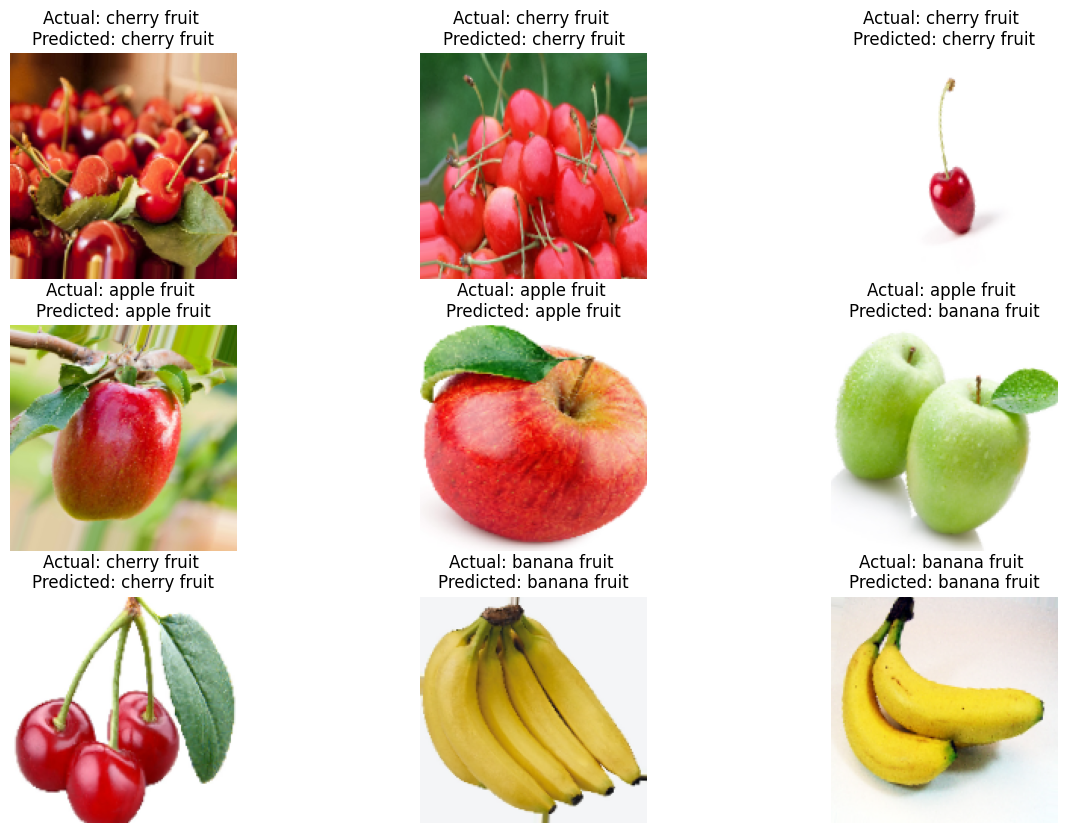

In [67]:
import random

# Take some random validation images
x, y = next(val_generator)
preds = best_model.predict(x)

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.axis('off')
    plt.title(
        f"Actual: {list(val_generator.class_indices.keys())[np.argmax(y[i])]} \nPredicted: {list(val_generator.class_indices.keys())[np.argmax(preds[i])]}"
    )
plt.show()


In [59]:
from tensorflow.keras.models import load_model

best_model = load_model(checkpoint_path)
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9524 - loss: 0.1537
Validation Accuracy: 0.95


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


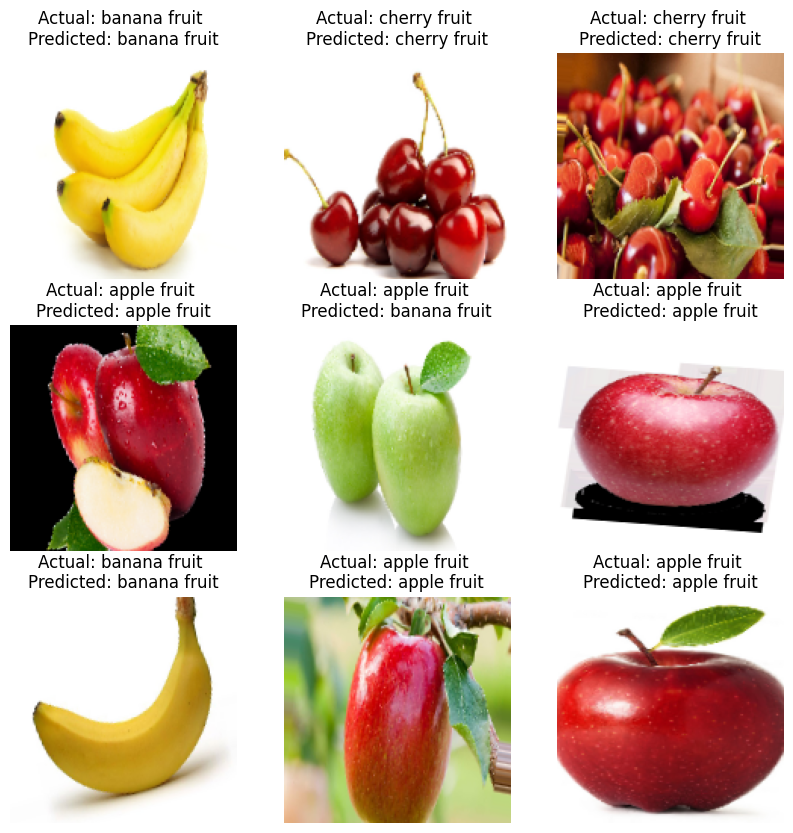

In [60]:
import random

# Take some random validation images
x, y = next(val_generator)
preds = best_model.predict(x)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.axis('off')
    plt.title(
        f"Actual: {list(val_generator.class_indices.keys())[np.argmax(y[i])]} \nPredicted: {list(val_generator.class_indices.keys())[np.argmax(preds[i])]}"
    )
plt.show()


In [61]:
# Train aur validation accuracy & loss print
print("Training Accuracy per epoch:", history.history['accuracy'])
print("Validation Accuracy per epoch:", history.history['val_accuracy'])
print("Training Loss per epoch:", history.history['loss'])
print("Validation Loss per epoch:", history.history['val_loss'])


Training Accuracy per epoch: [0.40229883790016174, 0.3333333432674408, 0.36781609058380127, 0.4597701132297516, 0.517241358757019, 0.6091954112052917, 0.6896551847457886, 0.7356321811676025, 0.7241379022598267, 0.7356321811676025, 0.7931034564971924, 0.7701149582862854, 0.7701149582862854, 0.8275862336158752, 0.7816091775894165, 0.8850574493408203, 0.8735632300376892, 0.8965517282485962, 0.9080459475517273, 0.8850574493408203, 0.954023003578186, 0.9425287246704102, 0.9425287246704102, 0.954023003578186, 0.9425287246704102, 0.9425287246704102, 0.9655172228813171, 0.9655172228813171, 0.9080459475517273, 0.9425287246704102, 0.977011501789093, 0.977011501789093, 0.9655172228813171, 0.954023003578186, 0.9655172228813171, 0.954023003578186, 0.977011501789093, 1.0, 0.954023003578186]
Validation Accuracy per epoch: [0.2857142984867096, 0.380952388048172, 0.380952388048172, 0.3333333432674408, 0.6190476417541504, 0.6666666865348816, 0.7142857313156128, 0.8571428656578064, 0.7142857313156128, 0.

In [62]:
from tensorflow.keras.models import load_model

best_model = load_model(checkpoint_path)
val_loss, val_acc = best_model.evaluate(val_generator, verbose=1)
print(f"Best Model Validation Accuracy: {val_acc*100:.2f}%")
print(f"Best Model Validation Loss: {val_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9524 - loss: 0.1734
Best Model Validation Accuracy: 95.24%
Best Model Validation Loss: 0.1734


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


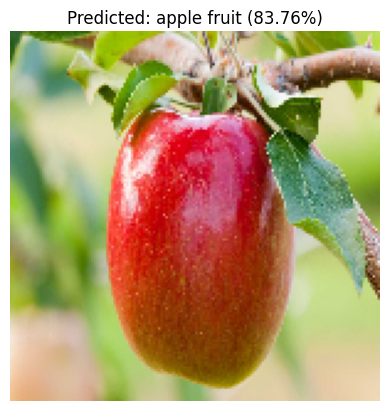

Predicted Class: apple fruit
Prediction Probability: 0.837642


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to test image
test_img_path = '/content/drive/MyDrive/images/apple fruit/Image_12.jpg'

# Load & preprocess image
img = image.load_img(test_img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array_exp)
class_indices = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_indices[np.argmax(prediction)]
predicted_prob = np.max(prediction)

# Show image with prediction
plt.imshow(img_array)
plt.axis('off')
plt.title(f"Predicted: {predicted_class} ({predicted_prob*100:.2f}%)")
plt.show()

print("Predicted Class:", predicted_class)
print("Prediction Probability:", predicted_prob)

